# Drug Response Classification using Support Vector Machine (SVM)

## Task 1: Exploratory Data Analysis (EDA)
### 1. Load the Dataset & Basic Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Pharma_Industry.csv')
df.head()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [7]:
df.describe()


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


### 2. Feature Distribution (Histograms & Boxplots)

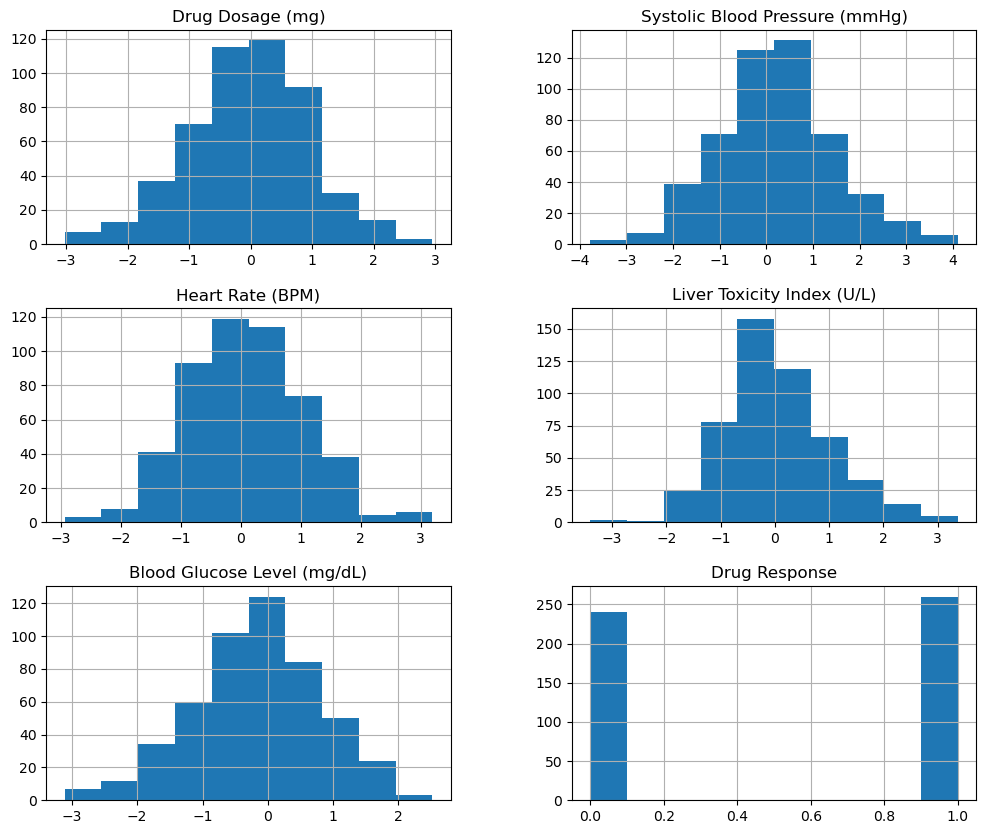

In [10]:
df.hist(figsize=(12,10))
plt.show()


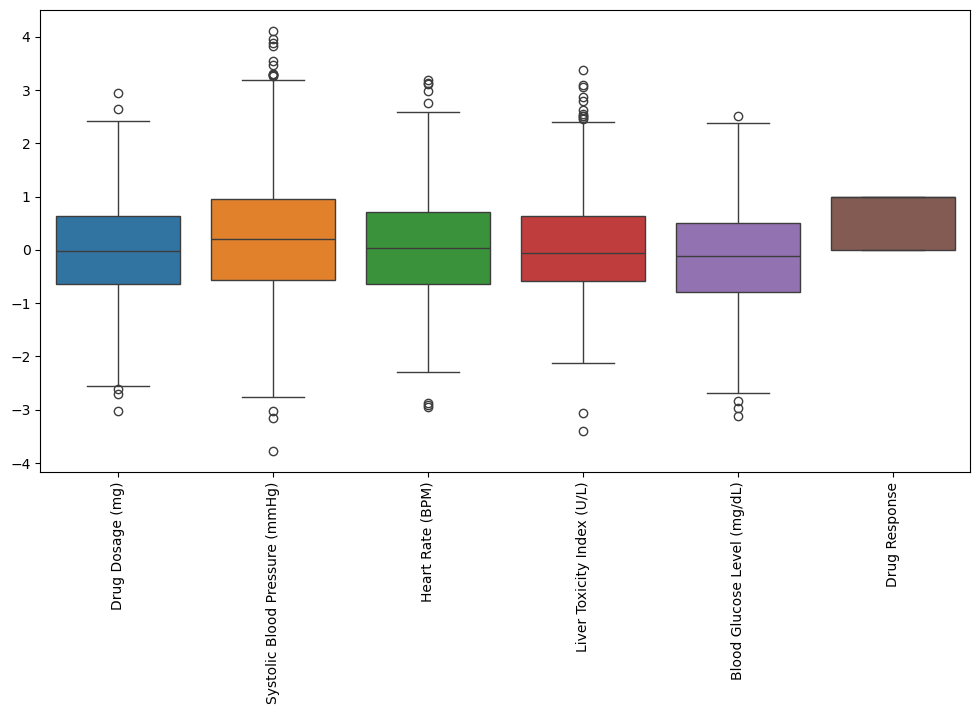

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


### 3. Feature Correlation Analysis

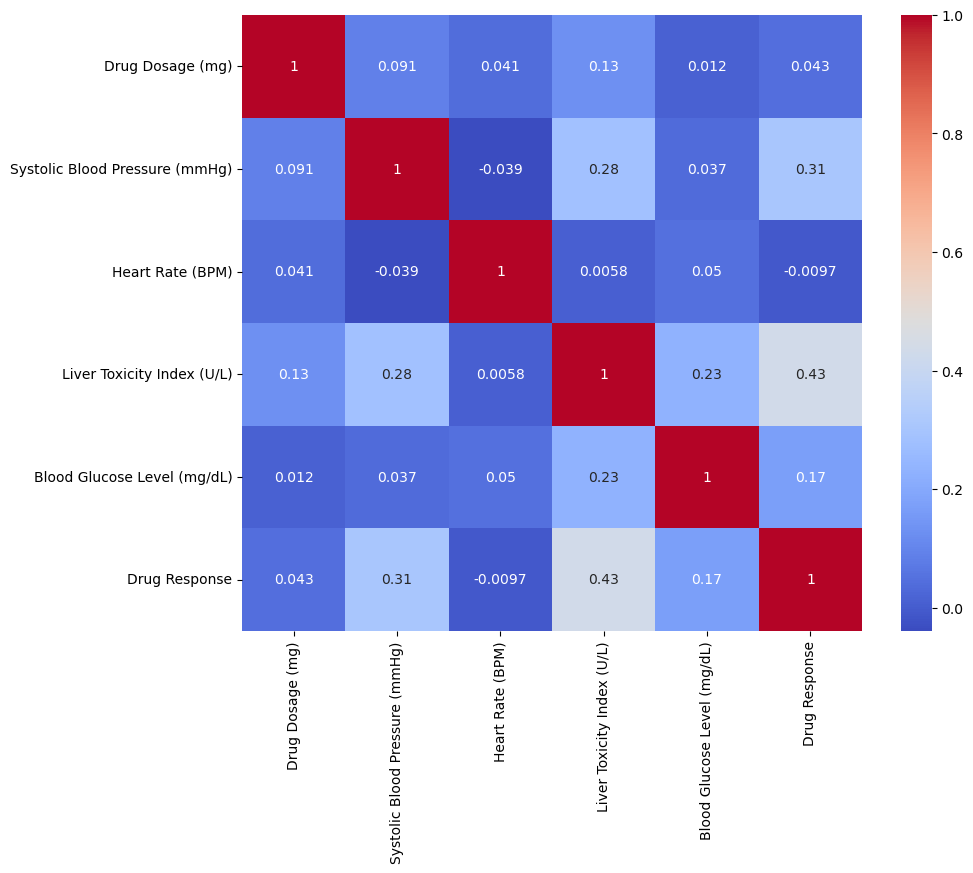

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Task 2: Data Preprocessing
### 1. Encode Categorical Variables (if any)

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)


### 2. Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('Drug Response', axis=1)
y = df_encoded['Drug Response']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Task 3: Data Visualization
### 1. Scatter Plot

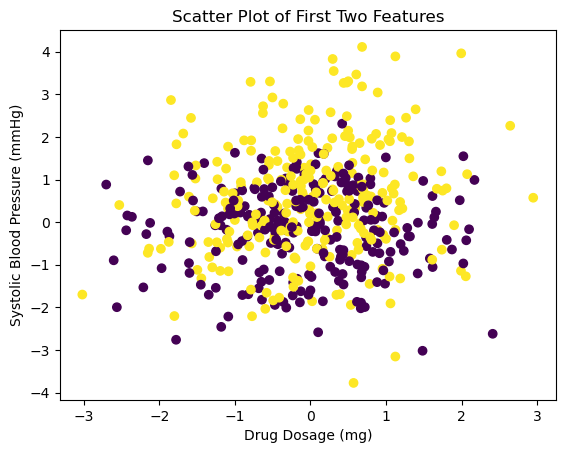

In [35]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Scatter Plot of First Two Features")
plt.show()


### 2. Class Distribution

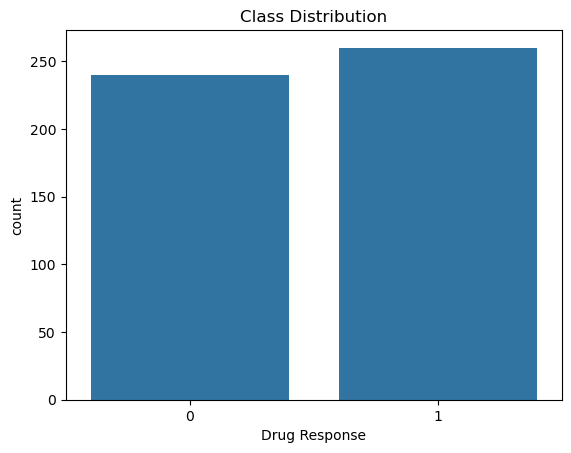

In [38]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


## Task 4: SVM Implementation
### 1. Train SVM Classifier

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

### 2. Model Evaluation

In [44]:
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.78
[[36  8]
 [14 42]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



## Task 5: Visualization of SVM Results

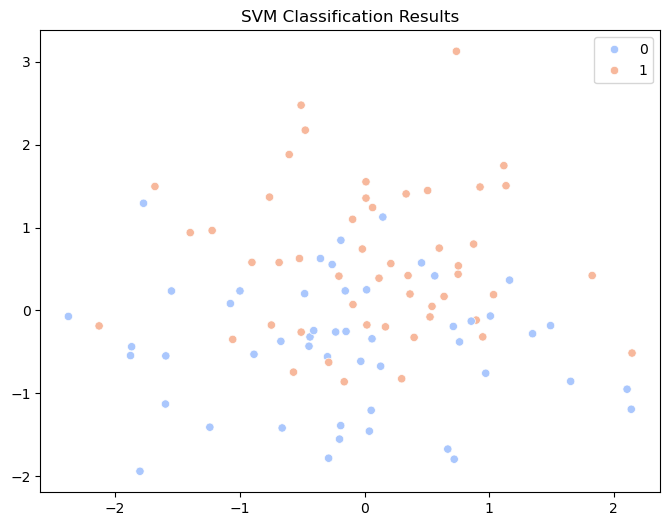

In [47]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_test[:,0],
    y=X_test[:,1],
    hue=y_pred,
    palette='coolwarm'
)
plt.title("SVM Classification Results")
plt.show()


## Task 6: Parameter Tuning and Optimization

In [50]:
kernels = ['linear', 'poly', 'rbf']
for k in kernels:
    model = SVC(kernel=k, C=1)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Kernel: {k}, Accuracy: {accuracy_score(y_test, pred)}")


Kernel: linear, Accuracy: 0.78
Kernel: poly, Accuracy: 0.7
Kernel: rbf, Accuracy: 0.84


## Task 7: Comparison and Analysis
### 1. Kernel Comparison Summary
| Kernel     | Observation                            |
| ---------- | -------------------------------------- |
| Linear     | Works well for linearly separable data |
| Polynomial | Captures non-linear relationships      |
| RBF        | Best for complex data distributions    |


### 2. Strengths and Weaknesses of SVM
 Strengths

Effective in high-dimensional data

Works well with small-to-medium datasets

Robust to overfitting with proper kernel

 Weaknesses

Computationally expensive for large datasets

Sensitive to kernel and parameter selection

Harder to interpret compared to logistic regression

### 3. Practical Implications
SVM can predict drug effectiveness early

Reduces clinical trial cost and time

Supports personalized medicine

Helps pharmaceutical companies make data-driven decisions

## Conclusion

Support Vector Machines provide a powerful approach for drug response classification, especially when feature relationships are complex. With proper tuning, SVM models can significantly enhance predictive performance in healthcare applications.